In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from ipywidgets import interact, interact_manual

plt.rcParams['figure.figsize'] = (16,8)
plt.style.use('fivethirtyeight')

In [3]:
data=pd.read_csv('naukri.csv')

data.shape

(22000, 14)

In [4]:
data.head()

company  \
0                            MM Media Pvt Ltd   
1                          find live infotech   
2         Softtech Career Infosystem Pvt. Ltd   
3                      Onboard HRServices LLP   
4  Spire Technologies and Solutions Pvt. Ltd.   

                                           education   experience  \
0  UG: B.Tech/B.E. - Any Specialization PG:Any Po...    0 - 1 yrs   
1  UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...    0 - 0 yrs   
2  UG: Any Graduate - Any Specialization PG:Any P...    4 - 8 yrs   
3  UG: Any Graduate - Any Specialization PG:CA Do...  11 - 15 yrs   
4  UG: B.Tech/B.E. - Any Specialization PG:Any Po...    6 - 8 yrs   

                                   industry  \
0          Media / Entertainment / Internet   
1  Advertising / PR / MR / Event Management   
2           IT-Software / Software Services   
3    Banking / Financial Services / Broking   
4           IT-Software / Software Services   

                                      jobdescription         jobid  \
0  Job Description   Send me Jobs like this Quali...  210516002263   
1  Job Description   Send me Jobs like this Quali...  210516002391   
2  Job Description   Send me Jobs like this - as ...  101016900534   
3  Job Description   Send me Jobs like this - Inv...   81016900536   
4  Job Description   Send me Jobs like this Pleas...  120916002122   

                                 joblocation_address  \
0                                            Chennai   
1                                            Chennai   
2                                          Bengaluru   
3  Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...   
4                                          Bengaluru   

                                   jobtitle  numberofpositions  \
0  Walkin Data Entry Operator (night Shift)                NaN   
1        Work Based Onhome Based Part Time.               60.0   
2                    Pl/sql Developer - SQL                NaN   
3    Manager/ad/partner - Indirect Tax - CA                NaN   
4           JAVA Technical Lead (6-8 yrs) -                4.0   

                          payrate                   postdate site_name  \
0         1,50,000 - 2,25,000 P.A  2016-05-21 19:30:00 +0000       NaN   
1  1,50,000 - 2,50,000 P.A. 20000  2016-05-21 19:30:00 +0000       NaN   
2      Not Disclosed by Recruiter  2016-10-13 16:20:55 +0000       NaN   
3      Not Disclosed by Recruiter  2016-10-13 16:20:55 +0000       NaN   
4      Not Disclosed by Recruiter  2016-10-13 16:20:55 +0000       NaN   

                                  skills                           uniq_id  
0                                   ITES  43b19632647068535437c774b6ca6cf8  
1                              Marketing  d4c72325e57f89f364812b5ed5a795f0  
2  IT Software - Application Programming  c47df6f4cfdf5b46f1fd713ba61b9eba  
3                               Accounts  115d28f140f694dd1cc61c53d03c66ae  
4  IT Software - Application Programming  a12553fc03bc7bcced8b1bb8963f97b4

## Lets clean Job Location

In [5]:
data['joblocation_address']=data['joblocation_address'].str.split(',')
pd.set_option('max_rows', 22000)
data['joblocation_address']

0                                                [Chennai]
1                                                [Chennai]
2                                              [Bengaluru]
3        [Mumbai,  Bengaluru,  Kolkata,  Chennai,  Coim...
4                                              [Bengaluru]
5                                              [Bengaluru]
6        [Delhi NCR,  Mumbai,  Bengaluru,  Kochi,  Grea...
7                                              [Bengaluru]
8                                              [Bengaluru]
9                                              [Bengaluru]
10                            [Mumbai,  Delhi,  Bengaluru]
11                                             [Bengaluru]
12                                             [Bengaluru]
13                                             [Bengaluru]
14                                             [Bengaluru]
15                                             [Bengaluru]
16                                             [Bengalur

In [6]:
data = data.explode('joblocation_address')
pd.set_option('max_rows', 30000)
data['joblocation_address'].value_counts()

Bengaluru/Bangalore                               3775
Mumbai                                            2593
Bengaluru/Bangalore                               2134
Bengaluru                                         2026
 Mumbai                                           1378
Chennai                                           1290
Hyderabad / Secunderabad                          1246
Hyderabad                                         1154
Mumbai                                            1067
 Mumbai                                            923
 Chennai                                           905
Delhi                                              790
Noida                                              777
Gurgaon                                            762
 Chennai                                           738
 Hyderabad / Secunderabad                          700
Delhi                                              680
 Pune                                              645
 Delhi    

In [7]:

data['joblocation_address'] = data['joblocation_address'].replace(('(Bengaluru/Bangalore)',' Bangalore',
                                                                ' Bangalore ','Bangalore ','Bengaluru/Bangalore ',
                                                                 ' Bengaluru/Bangalore ',' Bengaluru/Bangalore',
                                                                'Bengaluru/Bangalore','Bengaluru','NCR Bangalore',
                                                                'NCR Bangalore ','Near Bangalore', ' Bengaluru/Bangalore',
                                                                 ' Bengaluru/Bangalore ', ' Bengaluru',
                                                                 'Bangalore , Bangalore / Bangalore',
                                                                 'Bangalore , karnataka',' Bengaluru / Bangalore', 
                                                                 ' Bengaluru / Bangalore ', 'Bengaluru Bangalore',
                                                                 'India-Karnataka-Bangalore',' bangalore',' karnataka',
                                                                ' Bengaluru Bangalore'),
                                                                ('Bangalore','Bangalore','Bangalore','Bangalore','Bangalore',
                                                                'Bangalore','Bangalore','Bangalore','Bangalore','Bangalore',
                                                                'Bangalore','Bangalore','Bangalore','Bangalore','Bangalore',
                                                                 'Bangalore','Bangalore', 'Bangalore','Bangalore','Bangalore',
                                                                'Bangalore','Bangalore','Bangalore','Bangalore',))
                                                                
data['joblocation_address'] = data['joblocation_address'].replace(('Hyderabad / Secunderabad',' Hyderabad / Secunderabad',
                                                                 ' Hyderabad / Secunderabad ','Hyderabad / Secunderabad ',
                                                                ' Hyderabad','Hyderabad ',' Hyderabad ',
                                                                 'Hyderabad/Secunderabad','Hyderabad/Secunderabad ',
                                                                ' Hyderabad/Secunderabad ',' Hyderabad/Secunderabad',),
                                                                ('Hyderabad', 'Hyderabad','Hyderabad','Hyderabad',
                                                                 'Hyderabad', 'Hyderabad','Hyderabad','Hyderabad',
                                                                'Hyderabad','Hyderabad','Hyderabad'))


  
data['joblocation_address'] = data['joblocation_address'].replace(('NAVI MUMBAI',' NAVI MUMBAI','NAVI MUMBAI ',
                                                                 ' NAVI MUMBAI',' NAVI MUMBAI ','Mumbai , Mumbai',
                                                                 ' Mumbai',' Mumbai ','Mumbai ','mumbai','Navi Mumbai',
                                                                ' Navi Mumbai',' Navi Mumbai ','Navi Mumbai ', 
                                                                 ' Mumbai Suburbs','Mumbai Suburbs ','Mumbai Suburbs',
                                                                ' Mumbai Suburbs ','mumbai',' mumbai','mumbai ',
                                                                 ' maharashtra'),
                                                                ('Mumbai','Mumbai','Mumbai','Mumbai','Mumbai','Mumbai',
                                                                 'Mumbai','Mumbai','Mumbai', 'Mumbai','Mumbai','Mumbai',
                                                                'Mumbai','Mumbai','Mumbai','Mumbai','Mumbai','Mumbai','Mumbai',
                                                                'Mumbai','Mumbai', 'Mumbai'))

data['joblocation_address'] = data['joblocation_address'].replace(('Noida','Noida ',' Noida',' Delhi','Delhi','Delhi ',' Delhi ',
                                                                 'Gurgaon',' Gurgaon',' Gurgaon ','Gurgaon ', ' noida',
                                                                 ' Noida/Greater Noida',' Noida ', ' Delhi NCR',
                                                                 'Delhi/NCR(National Capital Region)',' Delhi/NCR ',
                                                                 ' Delhi/NCR(National Capital Region)',
                                                                 ' Delhi/NCR(National Capital Region) ',
                                                                 'Delhi/NCR(National Capital Region) ','Delhi , Delhi',
                                                                 'Noida , Noida/Greater Noida','Ghaziabad',
                                                                 'Delhi/NCR(National Capital Region) , Gurgaon',
                                                                 'NCR , NCR','NCR/NCR(National Capital Region)',
                                                                'NCR , NCR/Greater NCR','NCR/NCR(National Capital Region), NCR',
                                                                 'NCR , NCR/NCR(National Capital Region)',
                                                                 'NCR/NCR(National Capital Region)','NCR/Greater NCR',
                                                                 'NCR/NCR(National Capital Region) , NCR','Delhi/NCR ',
                                                                ' Noida/Greater Noida','Greater Noida',' Greater Noida',
                                                                 ' Greater Noida ','Greater Noida ','Ghaziabad',' Ghaziabad',
                                                                 'Ghaziabad ',' Ghaziabad ','Faridabad','Faridabad ',
                                                                 ' Faridabad',' Faridabad ',' Noida/Greater Noida',
                                                                 ' Noida/Greater Noida ',' delhi',' Delhi/NCR','Delhi NCR'
                                                                ),
                                                                ('NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR',
                                                                'NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR',
                                                                'NCR','NCR','NCR','NCR','NCR','NCR', 'NCR','NCR','NCR','NCR',
                                                                 'NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR',
                                                                 'NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR',
                                                                'NCR'))


data['joblocation_address'] = data['joblocation_address'].replace(('Chennai ',' Chennai',' Chennai ',' Chennai',
                                                                 'chennai ',' chennai',' chennai ',' chennai',),
                                                                ('Chennai', 'Chennai','Chennai','Chennai','Chennai',
                                                                'Chennai','Chennai','Chennai',))

data['joblocation_address'] = data['joblocation_address'].replace(('Pune ',' Pune',' Pune '),('Pune','Pune','Pune'))
data['joblocation_address'] = data['joblocation_address'].replace(('Kolkata ',' Kolkata',' Kolkata ',
                                                                ' kolkata','kolkata ',' kolkata'),
                                                                ('Kolkata','Kolkata','Kolkata',
                                                                  'Kolkata','Kolkata','Kolkata'))
data['joblocation_address'] = data['joblocation_address'].replace((' Ahmedabad','Ahmedabad ',' Ahmedabad '),('Ahmedabad',
                                                                                         'Ahmedabad','Ahmedabad'))
data['joblocation_address'] = data['joblocation_address'].replace(('Chandigarh ',' Chandigarh',' Chandigarh '),
                                                                ('Chandigarh','Chandigarh','Chandigarh'))
data['joblocation_address'] = data['joblocation_address'].replace(('Surat ',' Surat',' Surat '),
                                                                ('Surat','Surat','Surat'))
data['joblocation_address'] = data['joblocation_address'].replace(('Ernakulam / Kochi/ Cochin ', ' Kochi', 'Kochi ',' Kochi ',
                                                                 ' Cochin/ Kochi/ Ernakulam', ' Cochin/ Kochi/ Ernakulam ', 
                                                                 ' Ernakulam / Kochi/ Cochin',' Ernakulam / Kochi/ Cochin '),
                                                                ('Kochi','Kochi','Kochi','Kochi','Kochi','Kochi','Kochi',
                                                                 'Kochi',))
data['joblocation_address'] = data['joblocation_address'].replace(('Coimbatore ',' Coimbatore',' Coimbatore '),
                                                                ('Coimbatore','Coimbatore','Coimbatore'))
data['joblocation_address'] = data['joblocation_address'].replace(('Coimbatore ',' Coimbatore',' Coimbatore '),
                                                                ('Coimbatore','Coimbatore','Coimbatore'))
data['joblocation_address'] = data['joblocation_address'].replace(('Lucknow ',' Lucknow',' Lucknow '),
                                                                ('Lucknow','Lucknow','Lucknow'))
data['joblocation_address'] = data['joblocation_address'].replace(('Jaipur ',' Jaipur',' Jaipur ','jaipur ',' jaipur',
                                                                 ' jaipur '),
                                                                ('Jaipur','Jaipur','Jaipur','Jaipur','Jaipur','Jaipur'))
data['joblocation_address'] = data['joblocation_address'].replace(('Vijayawada ',' Vijayawada',' Vijayawada '),
                                                                ('Vijayawada','Vijayawada','Vijayawada'))
data['joblocation_address'] = data['joblocation_address'].replace(('Visakhapatnam ',' Visakhapatnam',' Visakhapatnam ',
                                                                'Visakhapatnam/Vizag ',' Visakhapatnam/Vizag',
                                                                 ' Visakhapatnam/Vizag '),
                                                                ('Visakhapatnam','Visakhapatnam','Visakhapatnam',
                                                                 'Visakhapatnam','Visakhapatnam','Visakhapatnam',
                                                                ))

data['joblocation_address'] = data['joblocation_address'].replace((' Bhubaneshwar',' Bhubaneshwar',' Bhubaneshwar '),
                                                                ('Bhubaneshwar','Bhubaneshwar','Bhubaneshwar'))
data['joblocation_address'] = data['joblocation_address'].replace((' Patna',' Patna',' Patna '),
                                                                ('Patna','Patna','Patna'))

data['joblocation_address'] = data['joblocation_address'].replace((' Trivandrum',' Trivandrum',' Trivandrum '),
                                                                ('Trivandrum','Trivandrum','Trivandrum'))

data['joblocation_address'] = data['joblocation_address'].replace((' Mangalore',' Mangalore',' Mangalore '),
                                                                ('Mangalore','Mangalore','Mangalore'))
data['joblocation_address'] = data['joblocation_address'].replace((' Indore',' Indore',' Indore '),
                                                                ('Indore','Indore','Indore'))
data['joblocation_address'] = data['joblocation_address'].replace((' Guwahati',' Guwahati',' Guwahati '),
                                                                ('Guwahati','Guwahati','Guwahati'))
data['joblocation_address'] = data['joblocation_address'].replace((' Nagpur',' Nagpur',' Nagpur '),
                                                                ('Nagpur','Nagpur','Nagpur'))
data['joblocation_address'] = data['joblocation_address'].replace((' Raipur',' Raipur',' Raipur '),
                                                                ('Raipur','Raipur','Raipur'))
data['joblocation_address'] = data['joblocation_address'].replace((' Thane',' Thane',' Thane '),
                                                                ('Thane','Thane','Thane'))
data['joblocation_address'] = data['joblocation_address'].replace((' Bhopal',' Bhopal',' Bhopal '),
                                                                ('Bhopal','Bhopal','Bhopal'))
data['joblocation_address'] = data['joblocation_address'].replace((' Vadodara/Baroda',' Vadodara/Baroda',' Vadodara/Baroda ',
                                                                ' Vadodara','Vadodara ',' Vadodara '),
                                                                ('Vadodara','Vadodara','Vadodara','Vadodara',
                                                                 'Vadodara','Vadodara',))
                                                                                                                                  
pd.set_option('max_rows', 2400)
data['joblocation_address'].value_counts()

Bangalore                                         9963
NCR                                               8668
Mumbai                                            6403
Hyderabad                                         4570
Chennai                                           3373
Pune                                              1227
Kolkata                                            543
Ahmedabad                                          404
Chandigarh                                         189
Kochi                                              140
Coimbatore                                         136
Jaipur                                             131
Visakhapatnam                                      125
Surat                                              106
Lucknow                                            101
Vijayawada                                          84
Bhubaneshwar                                        74
Trivandrum                                          69
Vadodara  

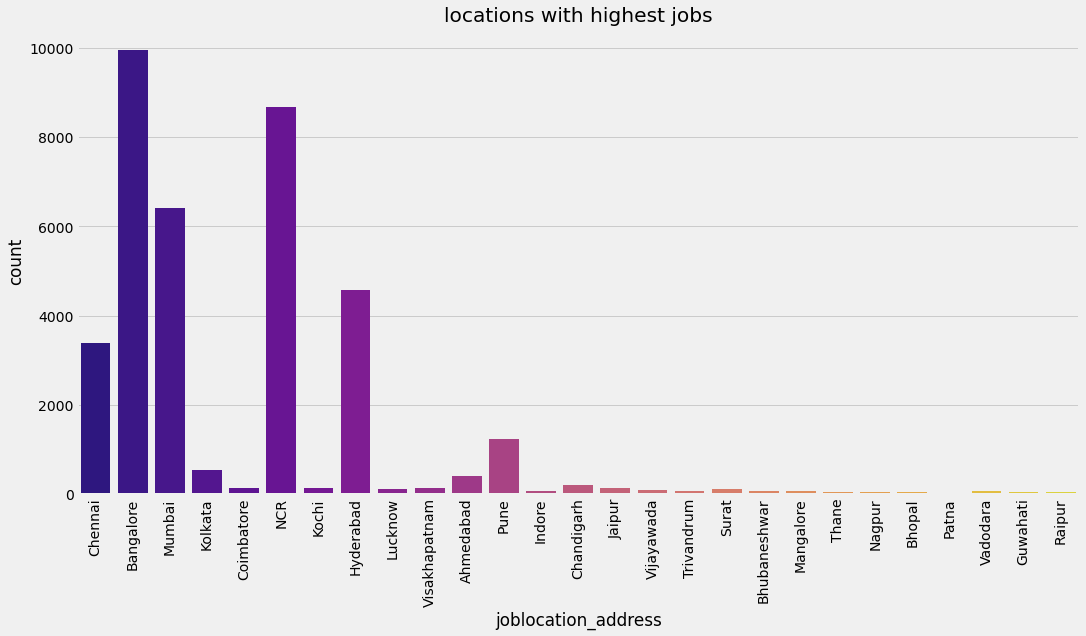

In [8]:
counts = data['joblocation_address'].value_counts()
data = data.loc[data['joblocation_address'].isin(counts.index[counts > 25])]

sns.countplot(data['joblocation_address'], palette='plasma')
plt.title('locations with highest jobs')
plt.xticks(rotation = 90)
plt.show()

## Lets clean Experience column

In [9]:
data['experience'].shape

(36723,)

In [10]:
pd.set_option('max_rows', 37000)
data['experience']=data.experience.str.split(' ')

In [11]:
data['min experience']=data['experience'].apply(lambda x: x[0])
data['max experience']=data['experience'].apply(lambda x: x[2] if len(x)>2 else x[1])

In [12]:
data['min experience'].value_counts()

2      7301
0      6340
3      5343
1      4490
5      3329
4      3135
6      1530
10     1430
8      1292
7      1048
9       486
12      315
15      285
Not     111
11       75
13       74
14       63
20       26
18       25
16       16
17        6
25        1
23        1
26        1
Name: min experience, dtype: int64

In [13]:
data['max experience'].value_counts()

5            6458
7            4494
8            3740
6            3303
3            3233
10           2860
4            2664
9            1815
2            1597
12           1085
1            1064
11           1059
15            834
13            682
20            501
0             358
14            251
18            134
Mentioned     111
16            109
17             94
22             85
25             85
19             27
23             26
24             20
21             12
30             11
28              8
26              1
-1              1
27              1
Name: max experience, dtype: int64

In [14]:
data['min experience']=data['min experience'].replace('Not',0)
data['max experience']=data['max experience'].replace(('Mentioned', -1),(5,5))

data['min experience']=data['min experience'].astype('int')
data['max experience']=data['max experience'].astype('int')

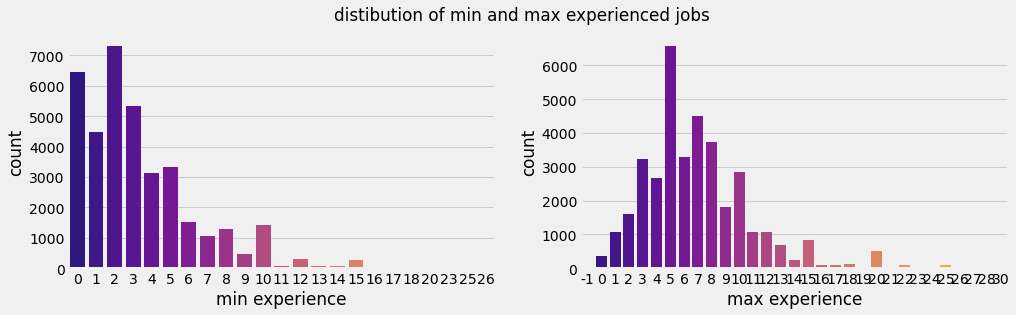

In [15]:
plt.rcParams['figure.figsize']=(15,4)

plt.subplot(121)
sns.countplot(data['min experience'], palette='plasma')

plt.subplot(122)
sns.countplot(data['max experience'], palette='plasma')

plt.suptitle('distibution of min and max experienced jobs')
plt.show()

## Lets clean the education column

In [16]:
data['education']

0        UG: B.Tech/B.E. - Any Specialization PG:Any Po...
1        UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...
2        UG: Any Graduate - Any Specialization PG:Any P...
3        UG: Any Graduate - Any Specialization PG:CA Do...
3        UG: Any Graduate - Any Specialization PG:CA Do...
3        UG: Any Graduate - Any Specialization PG:CA Do...
3        UG: Any Graduate - Any Specialization PG:CA Do...
3        UG: Any Graduate - Any Specialization PG:CA Do...
4        UG: B.Tech/B.E. - Any Specialization PG:Any Po...
5        UG: B.Tech/B.E. - Any Specialization PG:MCA - ...
6                                                      NaN
6                                                      NaN
6                                                      NaN
6                                                      NaN
6                                                      NaN
6                                                      NaN
6                                                      N

In [17]:
data['education'] = data['education'].fillna('UG: Any Graduate - Any Specialization PG:Any \
                                             Postgraduate Doctorate:Doctorate Not Required')
data['education'].isnull().sum()

0

In [18]:
data['education'] = data['education'].str.split(' ')
data['education'] = data['education'].apply(lambda x: x[1] if len(x) > 1 else x[0])

data['education'].value_counts(dropna = False)

Any                    24216
B.Tech/B.E.             8835
B.Com                    647
B.Sc                     544
Diploma                  441
Graduation               397
B.B.A                    267
B.A                      240
BCA                      174
MBBS                     155
BDS                      109
B.Pharma                  97
Other                     86
B.Ed                      85
LLB                       71
Not                       54
-                         54
BHM                       54
Doctorate                 49
B.Arch                    37
B.Tech/B.E.,              23
B.Sc,                     21
Postgraduate              14
PG:CA                     10
Doctorate:Doctorate        9
B.Pharma,                  7
B.Com,                     5
Diploma,                   5
BVSC                       3
B.A,                       3
BCA,                       3
MBA/PGDM                   2
B.B.A,                     2
B.Des.                     1
BFA           

In [19]:
data['education'] = data['education'].replace(('B.Tech/B.E.','Graduation','Other','-','Not','B.Tech/B.E.,',
                                               'PG:CA','Diploma,','B.Com,','B.Pharma,','B.A,','BCA,','B.Sc,','MBA/PGDM','B.B.A,','Postgraduate',
                                              'PG:Other','Doctorate:Doctorate','Post'),
                                              
                                              ('B.Tech/BE','Any Graduation','Any Graduation','Any Graduation','Any Graduation','B.Tech/BE',
                                              'CA','Diploma','B.Com','B.Pharma','B.A','BCA','B.Sc','MBA','BBA','Any PG',
                                              'Any PG','Doctorate','Any PG'))

data['education'].value_counts()

Any               24216
B.Tech/BE          8858
B.Com               652
Any Graduation      591
B.Sc                565
Diploma             446
B.B.A               267
B.A                 243
BCA                 177
MBBS                155
BDS                 109
B.Pharma            104
B.Ed                 85
LLB                  71
Doctorate            58
BHM                  54
B.Arch               37
Any PG               15
CA                   10
BVSC                  3
MBA                   2
BBA                   2
BAMS                  1
B.Des.                1
BFA                   1
Name: education, dtype: int64

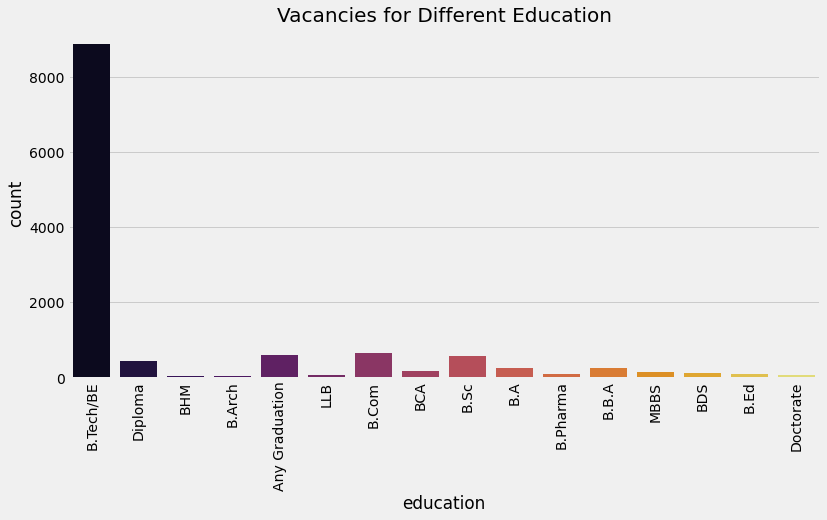

In [20]:
counts=data['education'].value_counts()
data = data.loc[data['education'].isin(counts.index[counts >= 25])]
x = data[data['education'] != 'Any']
plt.rcParams['figure.figsize'] = (12,6)
sns.countplot(x['education'], palette='inferno')
plt.title('Vacancies for Different Education', fontsize = 20)
plt.title('Vacancies for Different Education', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

## lets clean the industry column

In [21]:
data['industry']

0                         Media / Entertainment / Internet
1                 Advertising / PR / MR / Event Management
2                          IT-Software / Software Services
3                   Banking / Financial Services / Broking
3                   Banking / Financial Services / Broking
3                   Banking / Financial Services / Broking
3                   Banking / Financial Services / Broking
3                   Banking / Financial Services / Broking
4                          IT-Software / Software Services
5                          IT-Software / Software Services
6                          IT-Software / Software Services
6                          IT-Software / Software Services
6                          IT-Software / Software Services
6                          IT-Software / Software Services
6                          IT-Software / Software Services
6                          IT-Software / Software Services
6                          IT-Software / Software Servic

In [22]:
data['industry'].str.split(' / ')

data['industry'].isnull().sum()

1

In [23]:
data['industry'] = data['industry'].fillna(data['industry'].mode()[0])

data['industry'].isnull().sum()

0

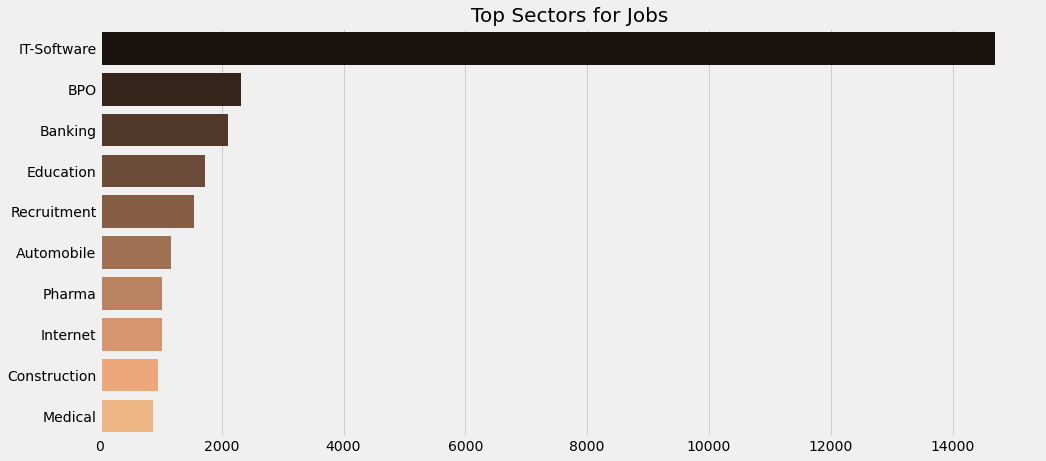

In [24]:
data['industry'] = data['industry'].str.split(' / ')
data['industry'] = data['industry'].apply(lambda x: x[0])

plt.rcParams['figure.figsize'] = (15, 7)
plt.title('Top Sectors for Jobs', fontsize = 20)
sns.barplot(y = data['industry'].value_counts().head(10).index,
            x = data['industry'].value_counts().head(10).values,
            palette = 'copper')
plt.show()

In [25]:
data['numberofpositions'].isnull().sum()

27811

In [26]:
data['numberofpositions'] = data['numberofpositions'].fillna(1)
data['numberofpositions'] = data['numberofpositions'].astype('int')
data['numberofpositions'].isnull().sum()

0

In [27]:
data['skills'].isnull().sum()

803

In [28]:
data['skills']=data['skills'].fillna(data['skills'].mode()[0])
data['skills'].isnull().sum()

0

In [29]:
data['skills'].value_counts()

IT Software - Application Programming      9981
Sales                                      5929
ITES                                       2949
Production                                 1587
Accounts                                   1529
HR                                         1454
Teaching                                   1350
Marketing                                  1327
Medical                                     817
Financial Services                          749
Site Engineering                            672
IT Software - Other                         634
Engineering Design                          621
IT Software - ERP                           563
IT Software - eCommerce                     529
IT Software - Network Administration        507
IT Software - QA & Testing                  479
IT Hardware                                 466
Journalism                                  427
IT Software - DBA                           424
Supply Chain                            

In [30]:
data['skills'] = data['skills'].str.split(' - ')
data['skills']=data['skills'].apply(lambda x: x[0])

In [36]:
data['skills'] = data['skills'].replace(("ITES"),('Software'))

In [37]:
data['skills'].value_counts()

IT Software                          14395
Sales                                 5929
Software                              2949
Production                            1587
Accounts                              1529
HR                                    1454
Teaching                              1350
Marketing                             1327
Medical                                817
Financial Services                     749
Site Engineering                       672
Engineering Design                     621
IT Hardware                            466
Journalism                             427
Supply Chain                           379
Design                                 342
Hotels                                 275
Analytics & Business Intelligence      251
Executive Assistant                    239
Travel                                 201
Strategy                               137
Legal                                  119
Top Management                         116
Export     

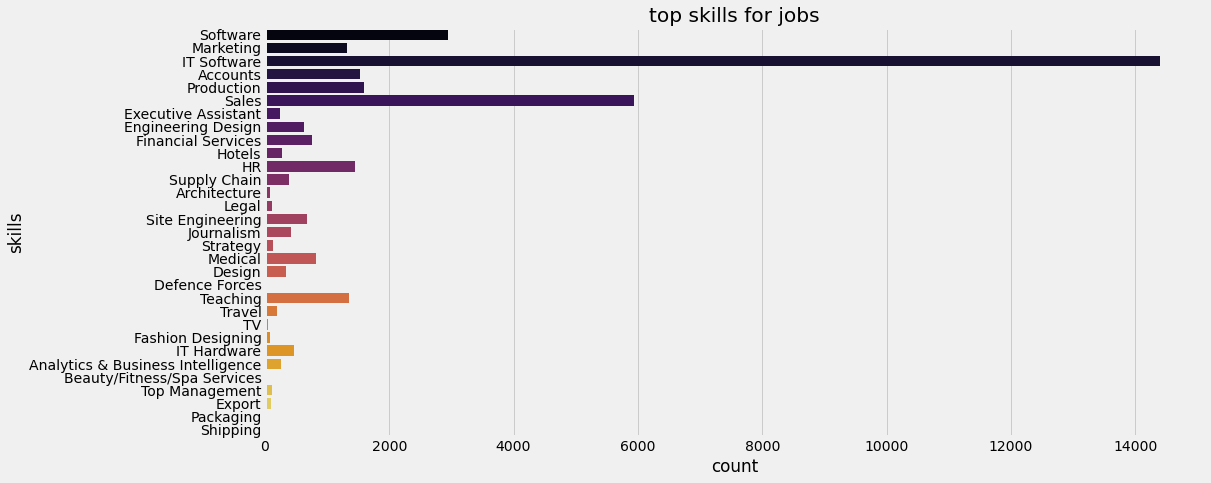

In [41]:
sns.countplot(y = data['skills'], palette = 'inferno')
plt.title('top skills for jobs')
plt.show()

In [42]:
data['payrate'] = data['payrate'].fillna(data['payrate'].mode()[0])
data = data.dropna()
data.isnull().sum().sum()

0

In [43]:
data['company'].nunique()

1307

In [44]:
data['jobtitle'].nunique()

3249

In [45]:
data['numberofpositions'].sum()

79331

In [46]:
data['skills'].nunique()

30

In [47]:
data['industry'].nunique()

57

In [48]:
data['joblocation_address'].nunique()

27

In [49]:
data[['skills','numberofpositions']].groupby(['skills']).agg('sum').sort_values(by = 'numberofpositions',
                                 ascending = False).head(15).style.background_gradient(cmap = 'copper')

In [50]:
pd.set_option('max_rows', 150)
@interact

def check(column = 'numberofpositions', x = 2000):
    return data.loc[data[column] >= x][['company','numberofpositions','joblocation_address']]

interactive(children=(Text(value='numberofpositions', description='column'), IntSlider(value=2000, description…

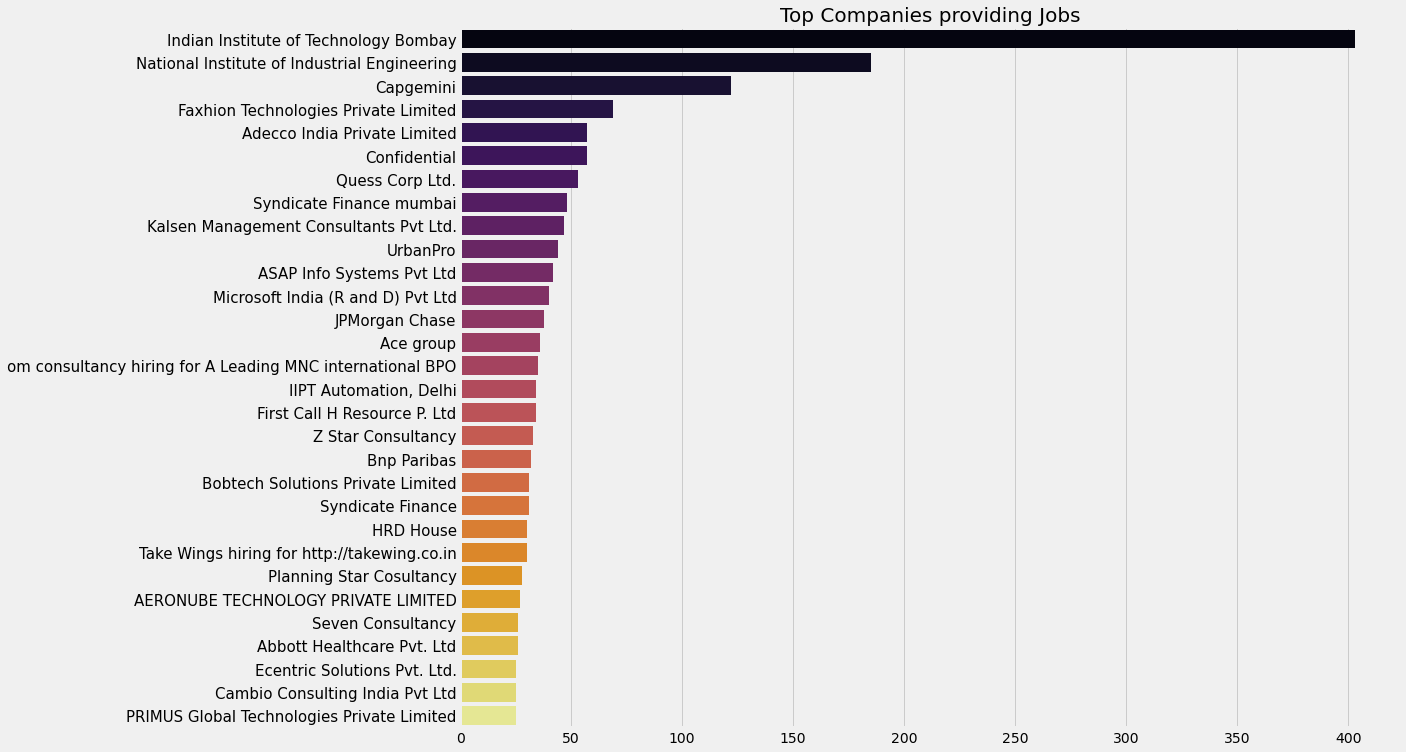

In [52]:
plt.rcParams['figure.figsize'] = (15, 12)
sns.barplot(y = data['company'].value_counts().head(30).index,
            x = data['company'].value_counts().head(30).values,
            palette = 'inferno')
plt.title('Top Companies providing Jobs', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [56]:
def check(x, y, z):
    loc = data[['company',
                  'industry',
                  'jobtitle',
                  'skills',
                  'experience',
                  'payrate']].loc[data['joblocation_address'] == x]
    skl = loc.loc[loc['skills'] == y]
    exp = skl.loc[skl['experience'] == z]
    return exp

In [58]:
check('Bangalore', 'Marketing', '0 - 1 yrs')

Empty DataFrame
Columns: [company, industry, jobtitle, skills, experience, payrate]
Index: []

In [61]:
pd.set_option('max_rows', 4000)
data['jobtitle'].value_counts()

Salesforce Developer                                                                21
Senior Software Engineer                                                            18
Business Development Manager                                                        18
Electronics Engineer-9599100728                                                     17
Technical Consultant Required for MNC International BPO in Chennai                  15
Opening for AR Callers in Medical Billing U.S Healthcare Process                    14
Banking Operation , BACK Office, Corporate Banking, Backend                         12
Java Developer                                                                      11
Wanted Electronics & Communication Engineers Fresher                                10
Accountant                                                                          10
Research Scientist | Fine / Specialty / Agro Chemicals                               9
Chordiant                                  